# State of the Union

## Sentiment Analysis With *sentimentr*

### Created by Lars Bernhardsson

I used the jupyter/datascience-notebook docker image found at https://hub.docker.com/r/jupyter/datascience-notebook when making this notebook.

## R session prep

In [1]:
# If you are using the jupyter/datascience-notebook docker image to run the notebooks in this repository,
# open a terminal window and run this first:
#
#   conda install r-sentimentr

library(tidyverse)
library(sentimentr)

options(stringsAsFactors = FALSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Load Data

In [2]:
if(file.exists("SOTUtexts.RData")) {
    load("SOTUtexts.RData")
} else {
    stop("Run the data notebook first")
}

## Processing

In [3]:
## Tokenize

sentences <- get_sentences(d)

In [4]:
head(sentences)

President,Speech,Term,Year,URL,Text,element_id,sentence_id
<chr>,<chr>,<chr>,<chr>,<chr>,<gt_sntnc>,<int>,<int>
40 Reagan,1981 Reagan,1st Term,1st Year,https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-program-for-economic-recovery-0,"Mr. Speaker, Mr. President, distinguished Members of Congress, honored guests, and fellow citizens: Only a month ago I was your guest in this historic building, and I pledged to you my cooperation in doing what is right for this Nation that we all love so much.",1,1
40 Reagan,1981 Reagan,1st Term,1st Year,https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-program-for-economic-recovery-0,"I'm here tonight to reaffirm that pledge and to ask that we share in restoring the promise that is offered to every citizen by this, the last, best hope of man on Earth.",1,2
40 Reagan,1981 Reagan,1st Term,1st Year,https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-program-for-economic-recovery-0,All of us are aware of the punishing inflation which has for the first time in 60 years held to double-digit figures for 2 years in a row.,1,3
40 Reagan,1981 Reagan,1st Term,1st Year,https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-program-for-economic-recovery-0,Interest rates have reached absurd levels of more that 20 percent and over 15 percent for those who would borrow to buy a home.,1,4
40 Reagan,1981 Reagan,1st Term,1st Year,https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-program-for-economic-recovery-0,"All across this land one can see newly built homes standing vacant, unsold because of mortgage interest rates.",1,5
40 Reagan,1981 Reagan,1st Term,1st Year,https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-program-for-economic-recovery-0,Almost 8 million Americans are out of work.,1,6


In [5]:
## Calculate Sentiment Scores

sentiments_overall <- sentiment(sentences)
sentiments_by_president <- sentiment_by(sentences$Text, by=list(sentences$President))
sentiments_by_speech <- sentiment_by(sentences$Text, by=list(sentences$Speech))
sentiments_by_term <- sentiment_by(sentences$Text, by=list(sentences$Term))
sentiments_by_year <- sentiment_by(sentences$Text, by=list(sentences$Year))

## Visualizations

### By President

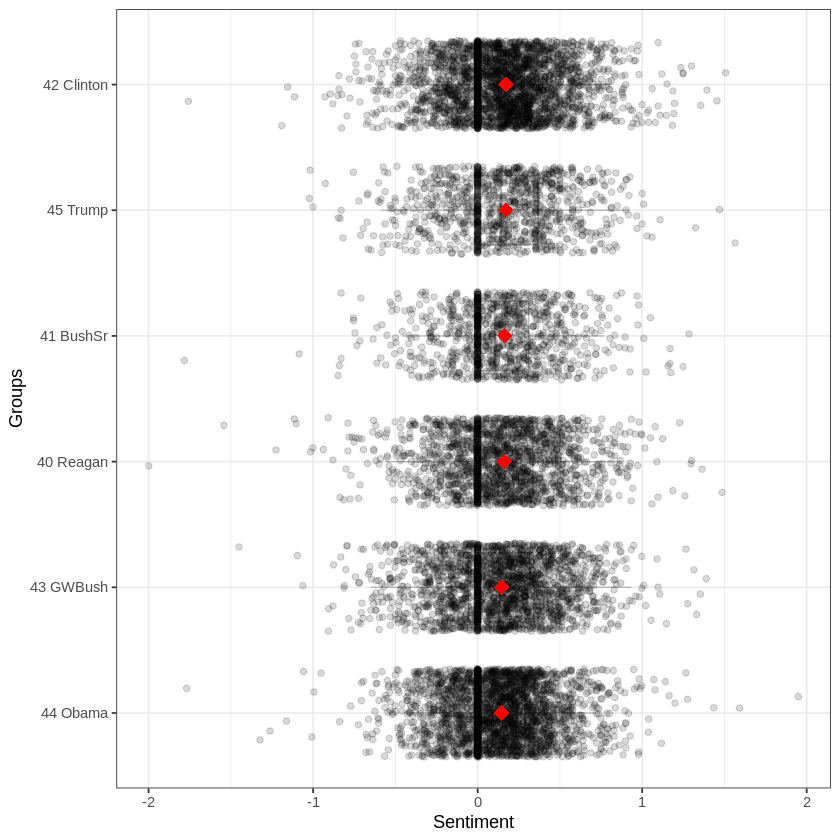

In [6]:
plot(sentiments_by_president)

### By Speech

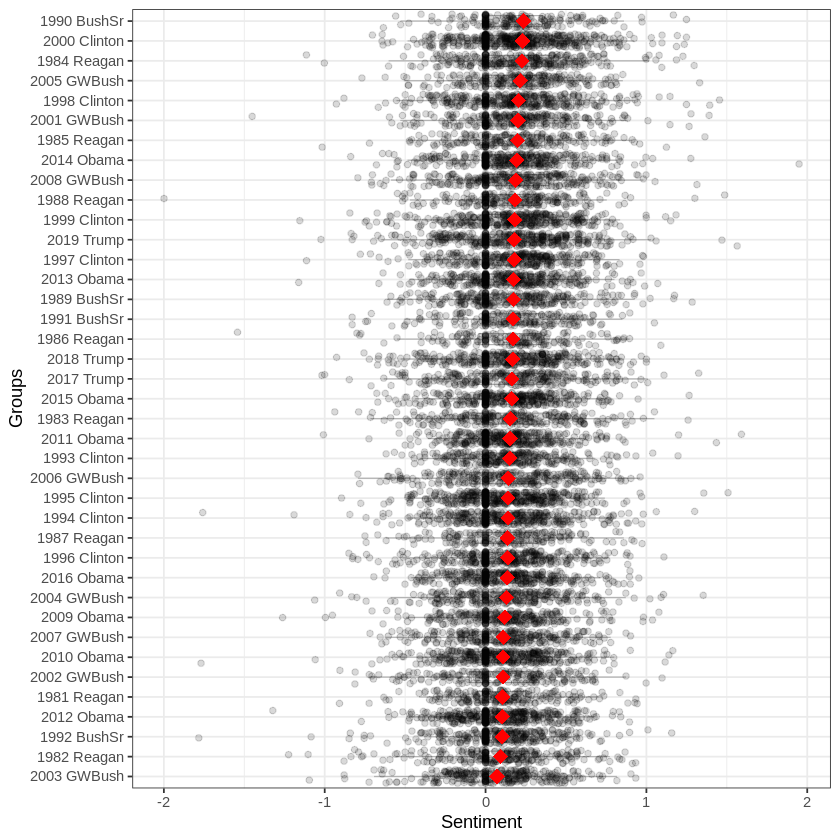

In [7]:
plot(sentiments_by_speech)

### By Term

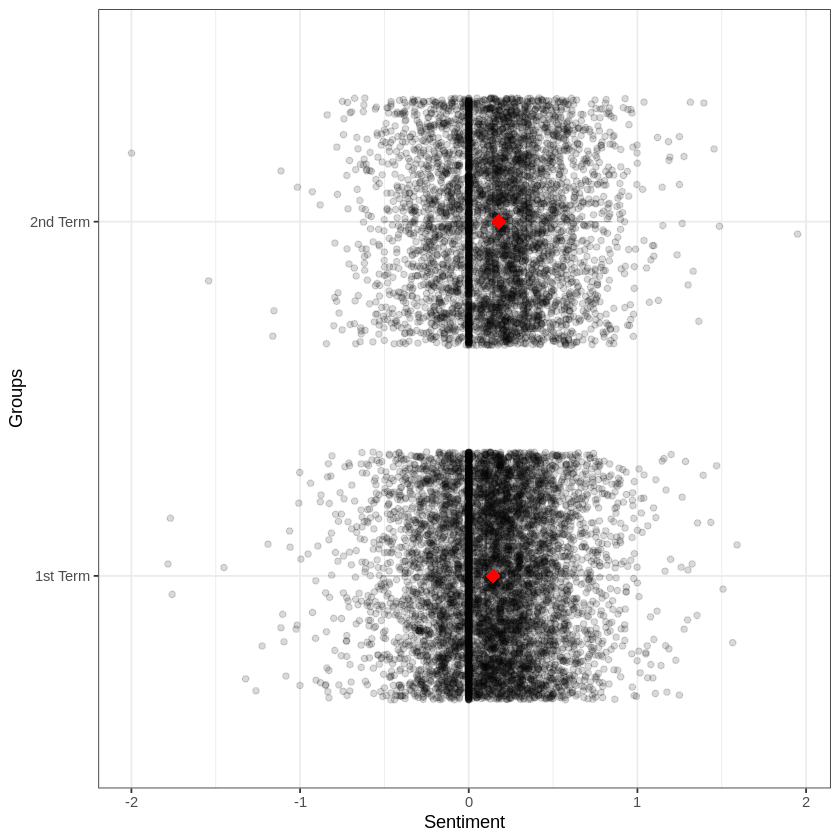

In [8]:
plot(sentiments_by_term)

### By Year

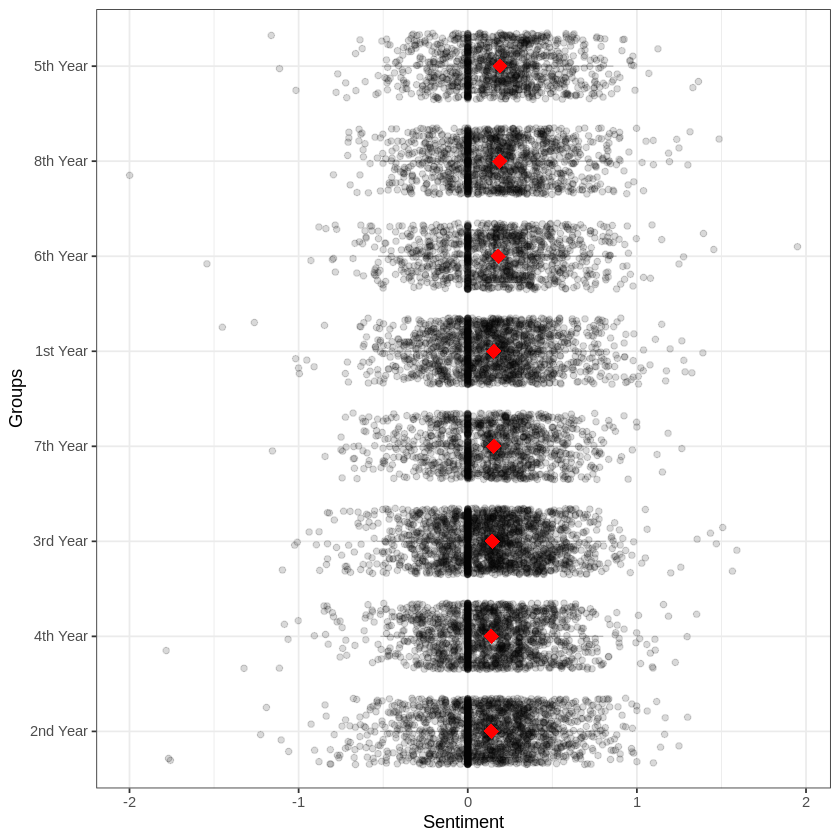

In [9]:
plot(sentiments_by_year)

### Cumulative Sentiment by President and Year

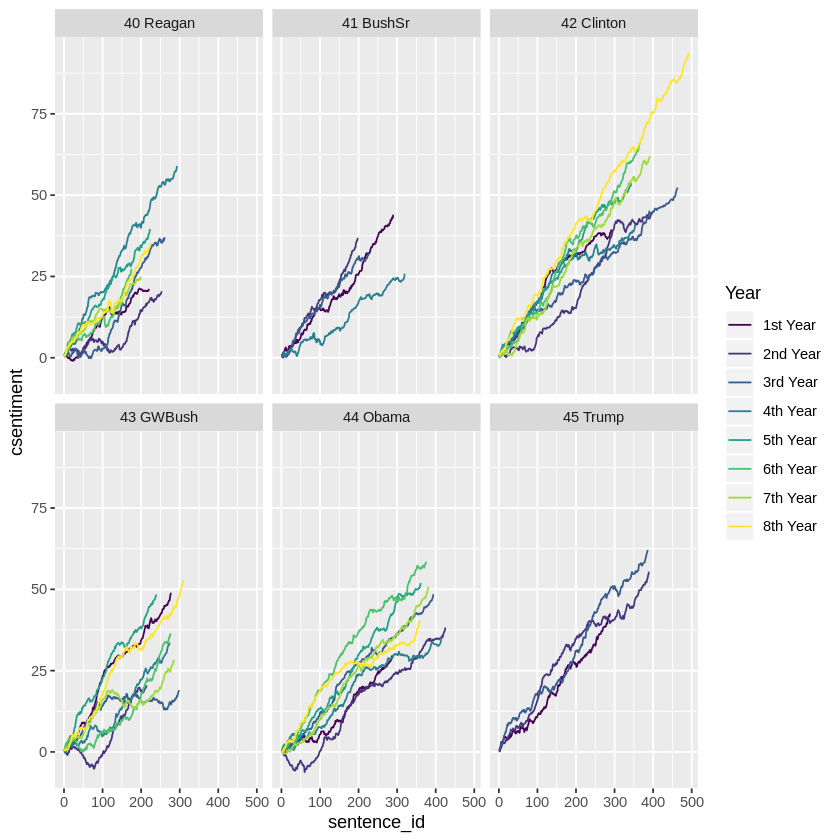

In [10]:
sentiments_overall %>%
    group_by(President, Year) %>%
    mutate(csentiment=cumsum(sentiment)) %>%
    ungroup() %>%
    ggplot(aes(x=sentence_id, y=csentiment, color=Year)) +
    geom_line() +
    scale_color_viridis_d() +
    facet_wrap(~ President)

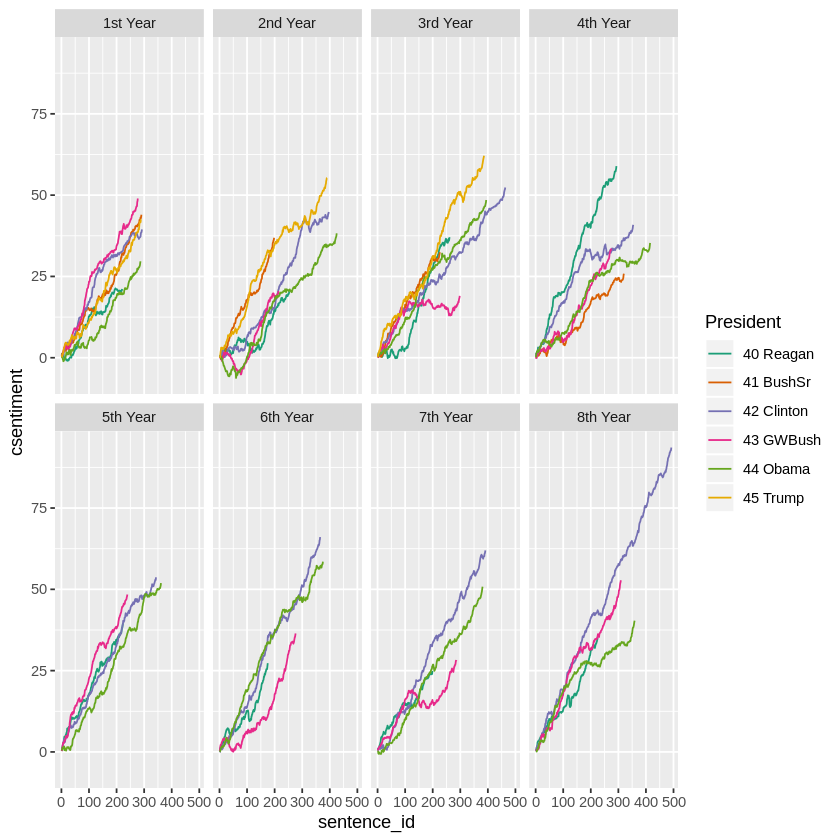

In [11]:
sentiments_overall %>%
    group_by(President, Year) %>%
    mutate(csentiment=cumsum(sentiment)) %>%
    ungroup() %>%
    ggplot(aes(x=sentence_id, y=csentiment, color=President)) +
    geom_line() +
    scale_color_brewer(palette="Dark2") +
    facet_wrap(~ Year, ncol=4)